In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from collections import Counter

In [5]:
listingsDF = pd.read_csv('listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
print("Data type : ", type(listingsDF))
print("Data dims : ", listingsDF.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


In [9]:
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [11]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_52983/3380900051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_52983/3380900051.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


In [13]:
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


Number of room types : 3

room_type
Entire home/apt    1805
Private room        947
Shared room          91
Name: count, dtype: int64


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_52983/279811037.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x="room_type", data=listingDF, kind="count", palette="Set2")


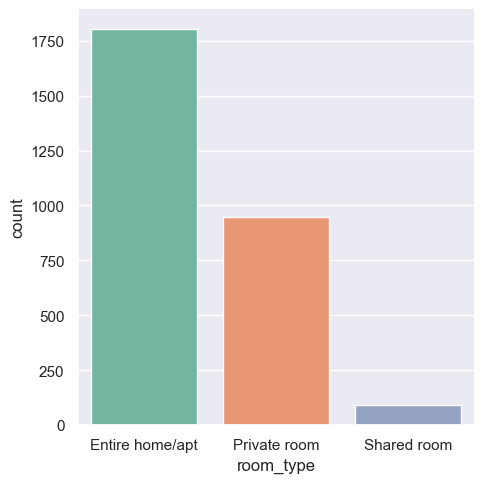

In [17]:
# Number of room types
print("Number of room types :", len(listingDF["room_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["room_type"].value_counts())

# Plot the count of each room type
sb.catplot(x="room_type", data=listingDF, kind="count", palette="Set2")


Number of property types : 15

property_type
House              1403
Apartment          1194
Townhouse            78
Condominium          68
Bed & Breakfast      26
Loft                 22
Cabin                17
Other                13
Camper/RV             8
Boat                  5
Tent                  4
Bungalow              2
Dorm                  1
Chalet                1
Treehouse             1
Name: count, dtype: int64


/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_52983/2446675827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)


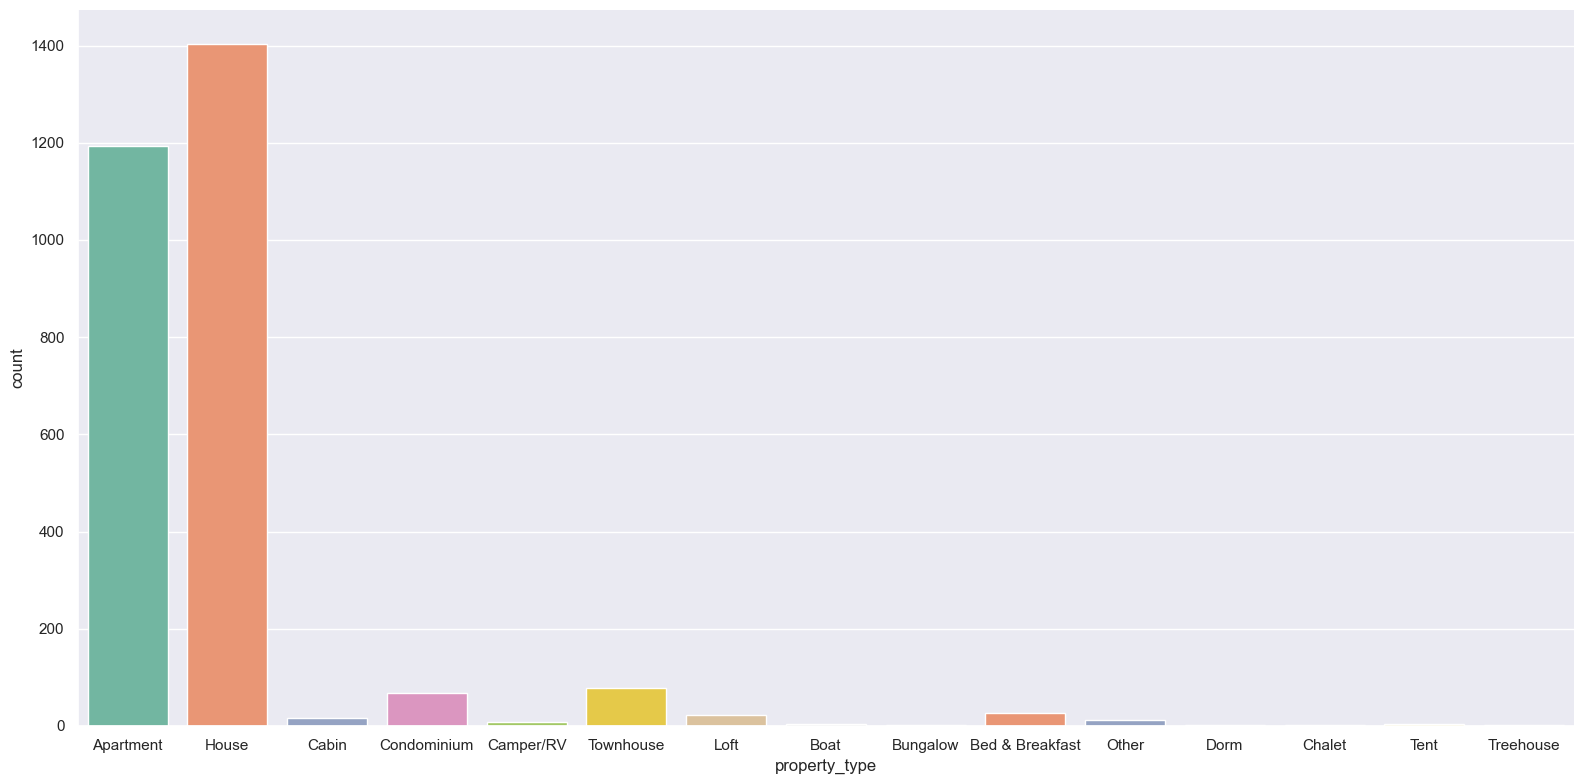

In [19]:
# Number of property types
print("Number of property types :", len(listingDF["property_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["property_type"].value_counts())
sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)

In [21]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = listingDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


<Axes: xlabel='room_type', ylabel='property_type'>

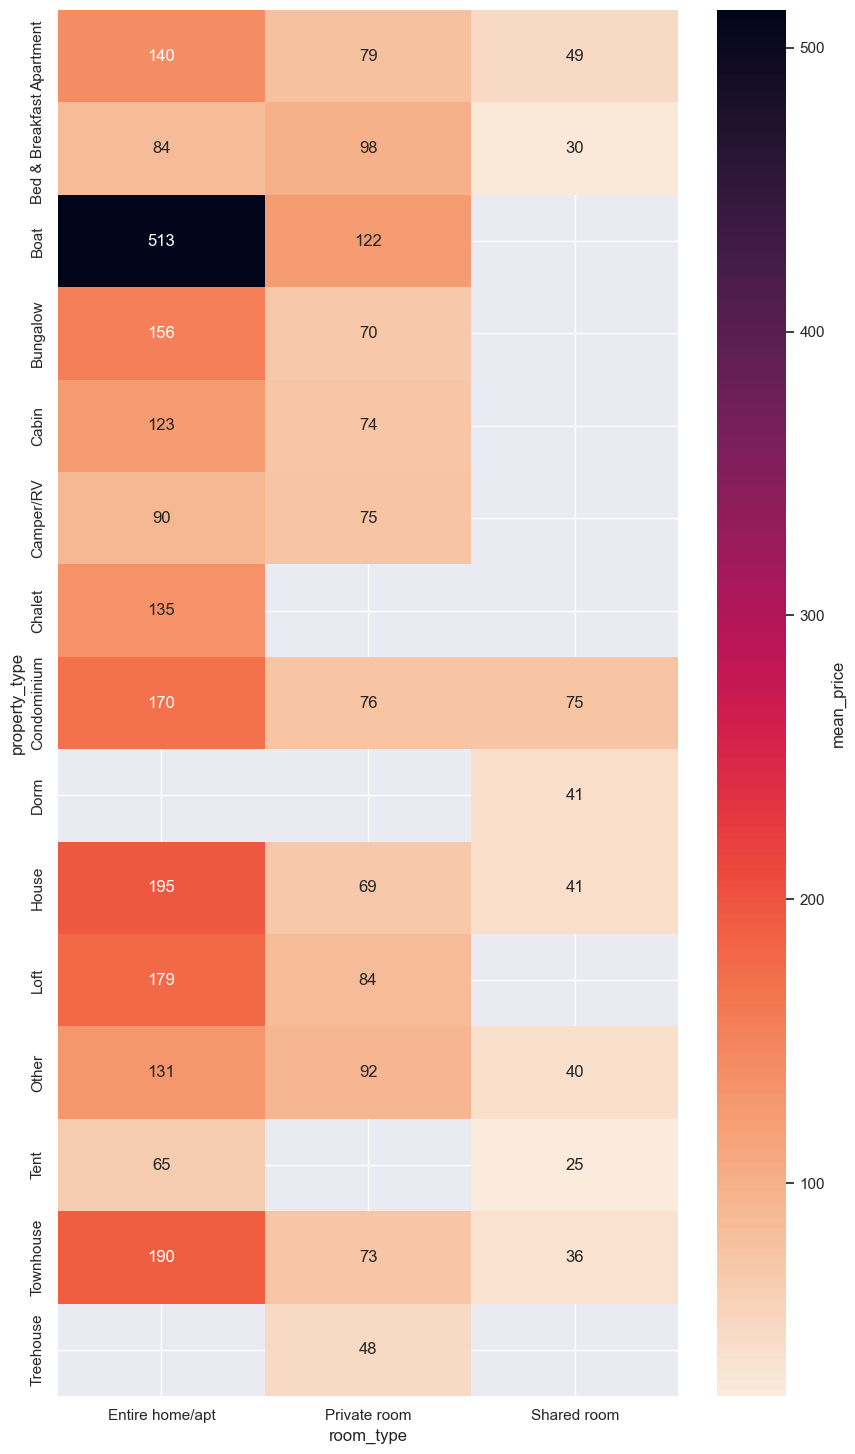

In [23]:
# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sb.heatmap(listingDF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

/var/folders/jq/99v6jxw10lb65zhj_x44dl8r0000gn/T/ipykernel_52983/656944402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='bedrooms', y='price', data=listingDF, palette="Set3", width=0.7)


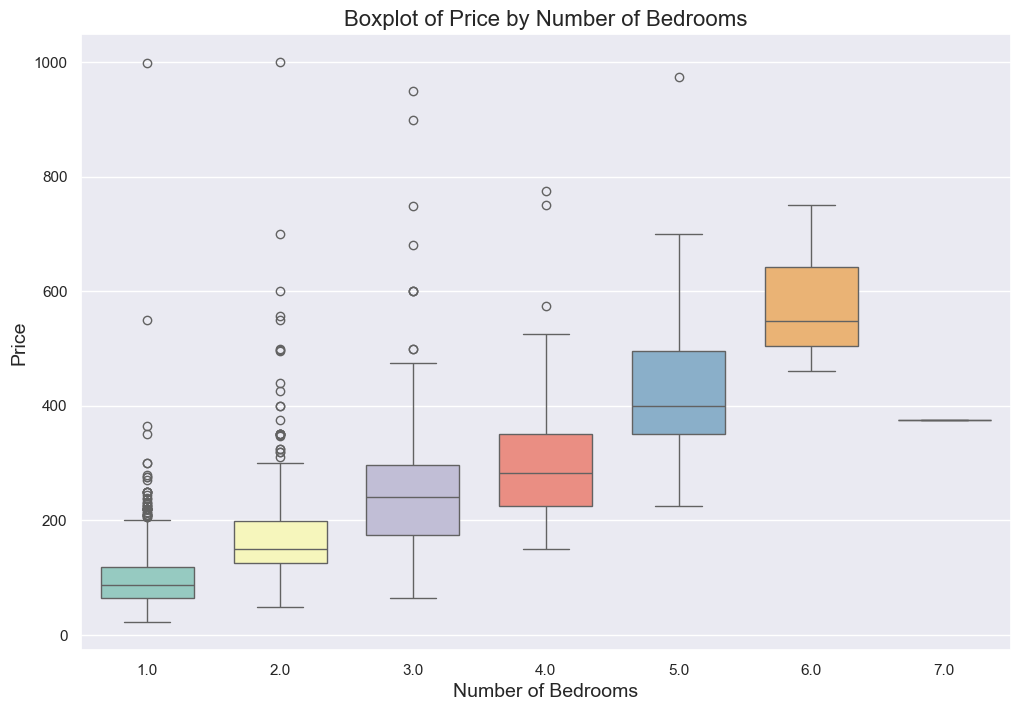

In [27]:
# Alternative code for plotting boxplot between price and number of bedrooms

plt.figure(figsize=(12, 8))  # Adjusted figure size for a better fit
sb.boxplot(x='bedrooms', y='price', data=listingDF, palette="Set3", width=0.7)

# Add a title and labels for better visualization
plt.title('Boxplot of Price by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()


In [29]:
# Creating a number of rooms vs property type dataframe
noRoomDF = listingDF[['property_type', 'bedrooms']]
noRoomDF.head(n=15)

,property_type,bedrooms
0,Apartment,1.0
1,Apartment,1.0
2,House,5.0
4,House,3.0
5,House,1.0
6,House,1.0
7,Cabin,1.0
8,Apartment,1.0
9,Apartment,1.0
10,House,1.0


/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the p

<Axes: xlabel='bedrooms', ylabel='property_type'>

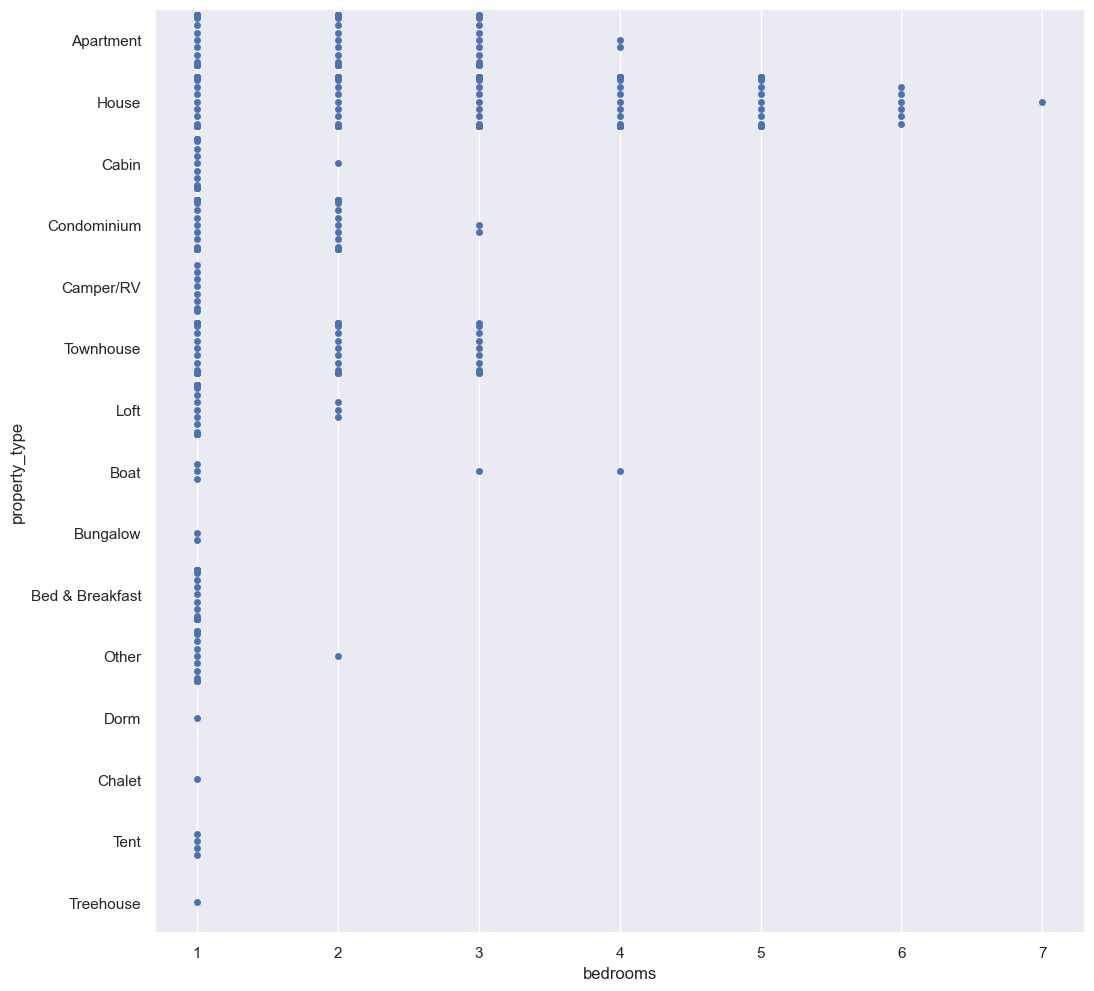

In [31]:
# Plotting a swarmplot to visually see the number of listings for each room_type and the no. bedrooms
plt.figure(figsize=(12,12))
sb.swarmplot(x='bedrooms', y='property_type', data=noRoomDF)

<Axes: xlabel='bedrooms', ylabel='property_type'>

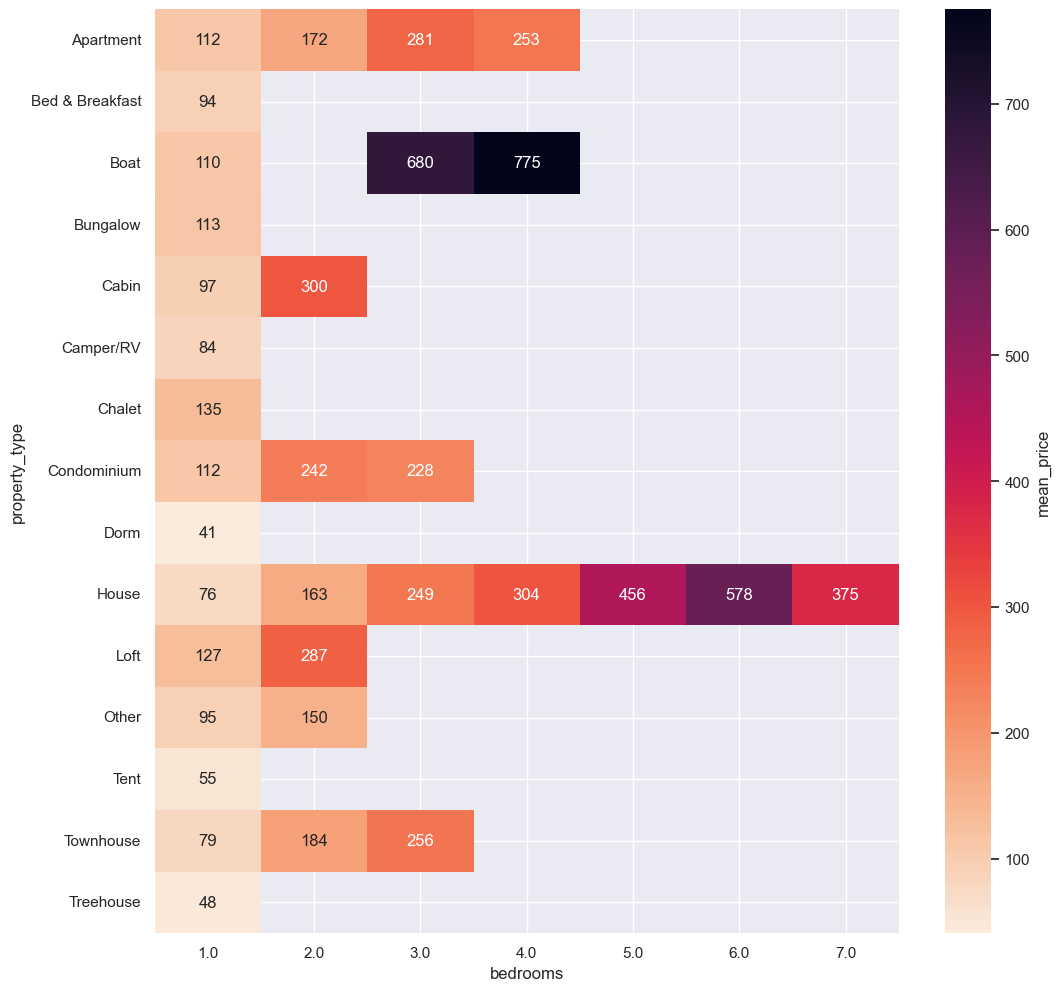

In [32]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sb.heatmap(listingDF.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

In [33]:
print("Number of bedrooms :", len(listingDF["bedrooms"].unique()))
print()
print("BedRms|Listings")
# Number of listings of each room type
print(listingDF["bedrooms"].value_counts())

Number of bedrooms : 7

BedRms|Listings
bedrooms
1.0    1999
2.0     532
3.0     236
4.0      52
5.0      17
6.0       6
7.0       1
Name: count, dtype: int64


In [39]:
import nltk
nltk.download('punkt')  # Download the punkt tokenizer


[nltk_data] Downloading package punkt to /Users/sarish/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
import nltk
nltk.download('wordnet')  # Download wordnet corpus
nltk.download('omw-1.4')  # Additional data for wordnet (optional, but recommended)


[nltk_data] Downloading package wordnet to /Users/sarish/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/sarish/nltk_data...


True

[nltk_data] Downloading package punkt to /Users/sarish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sarish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sarish/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


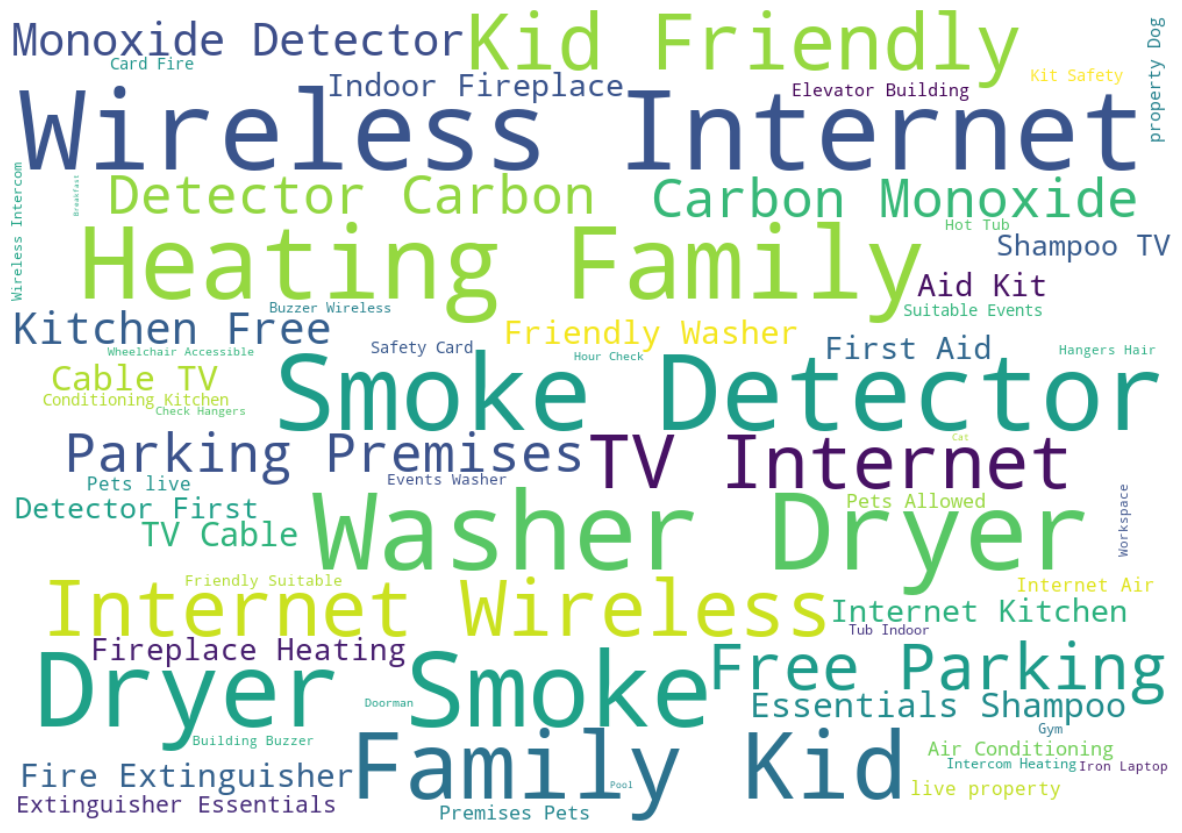

In [49]:
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the necessary NLTK resources
nltk.download('punkt')  # To tokenize words
nltk.download('stopwords')  # Stopwords corpus
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Optional: WordNet additional data

# Create a dataframe of the words that appear in the amenities section of the most expensive listings
amenitiesDF = listingDF[['amenities', 'price', 'id']]
amenitiesDFTopper = amenitiesDF.sort_values('price', ascending=[0])
amenitiesDFtop = amenitiesDFTopper.head(30)

allemenities = ''
for index, row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+', ' ', row['amenities'])
    allemenities += p

# Tokenize and process the text
allemenities_data = nltk.word_tokenize(allemenities)
filtered_data = [word for word in allemenities_data if word.lower() not in stopwords.words('english')]

# Lemmatize the words
wnl = nltk.WordNetLemmatizer()
allemenities_data = [wnl.lemmatize(data) for data in filtered_data]

# Join the processed words into a single string
allemenities_words = ' '.join(allemenities_data)

# Generate and display the word cloud
wordcloud = WordCloud(width=1000, height=700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [51]:
# From the above wordcloud, we can see that the listings with the highest prices have ammenities such as 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly'. These ammenities will be further explored in depth in the machine learning parts of the project.

In [ ]:
# From all the analysis above, we can say a few things:

1) Type of room for the listing has a great influence in the price. Most hosts list their entire property. Moreover, entire property lisitings cost the most.

2) The type of property also influences price. Although the highest price is fetched by boat houses, there are very few of them. The most common properties are houses and apartments since these are the 2 types of properties that most hosts list and they do fetch a high price provided the entire property is listed as mentioned in (1).

3) The number of bedrooms in the listing also has a general trend with the price of the listing. The more rooms available, the higher the price of the listing.

Finally, there are certain ammenities such as: 'Dryer', 'Washer', 'Kid Friendly', 'Heating', 'Free Parking' etc. that most expensive listings also provide. The ammenities will be further explored in the machine learning parts of the project.